# Imports Libraries and Defines Variables

In [1]:
#mengimport direktori dari google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#menghitung total waktu jalannya program
import time
total_time = time.time()

#mengabaikan peringatan
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#membuat data latih dan data uji
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import os
import cv2
import numpy as np
import random as rn
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#membuat model
from tensorflow.python.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers

#visualisasi hasil
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

In [0]:
Apple___Apple_scab_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Apple_scab'
Apple___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Black_rot'
Grape___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Black_rot'
Grape___Esca_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Esca_(Black_Measles)'
Grape___Leaf_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
Potato___Early_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Early_blight'
Potato___Late_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Late_blight'
Tomato___Bacterial_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Bacterial_spot'
Tomato___Septoria_leaf_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Septoria_leaf_spot'
Tomato___Target_Spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Target_Spot'

X=[]
Z=[]

NUM_CLASSES=2
CHANNELS=3
IMG_SIZE=224
BATCH_SIZE=32

TEST_SIZE=0.1
LEARNING_RATE=0.001
NUM_EPOCHS=2

RESNET_POOLING='avg'
RESNET_WEIGHTS='imagenet'
DENSE_LAYER_ACTIVATION='relu'
OUTPUT_DENSE_LAYER_ACTIVATION='softmax'
OBJECTIVE_FUNCTION='categorical_crossentropy'
LOSS_METRICS=['accuracy']

# Makes Train and Test Data

In [0]:
def assign_label(img,plantdisease_type):
    return plantdisease_type
    
def make_train_data(plantdisease_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,plantdisease_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_data_time = time.time()
make_train_data('Apple Scab',Apple___Apple_scab_DIR)
print(len(X))
make_train_data('Apple Black rot',Apple___Black_rot_DIR)
print(len(X))
make_data_time_spent=time.time() - make_data_time

100%|██████████| 500/500 [05:09<00:00,  1.62it/s]


500


100%|██████████| 500/500 [05:07<00:00,  1.63it/s]

1000


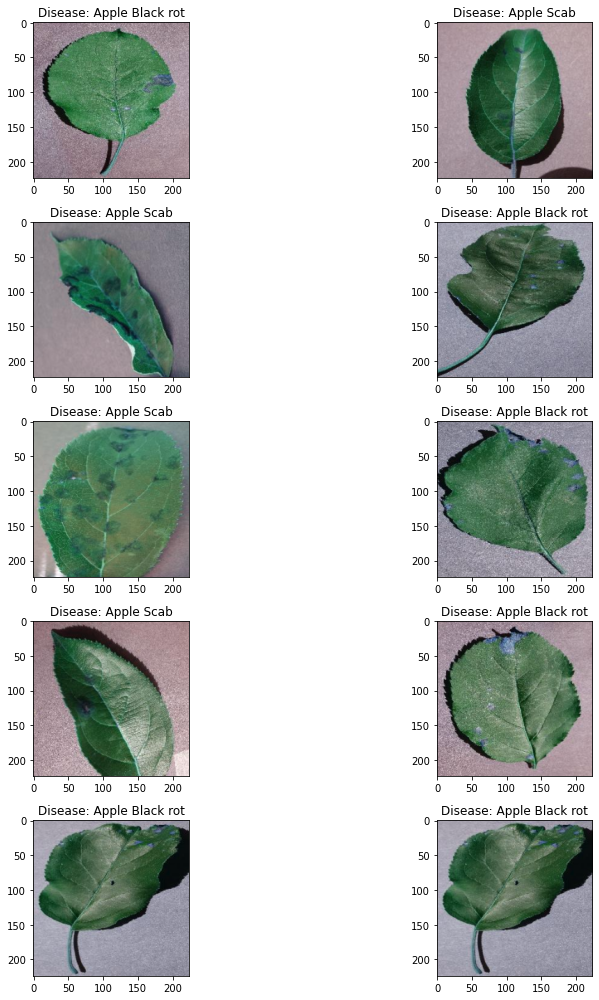

In [6]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(14,14)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Gambar: '+Z[l])
        
plt.tight_layout()

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=42)

In [9]:
x_train.shape

(900, 224, 224, 3)

In [10]:
x_test.shape

(100, 224, 224, 3)

In [11]:
y_train.shape

(900, 2)

In [12]:
y_test.shape

(100, 2)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

# Builds and Compiles the Model

In [14]:
resnet50_model= ResNet50(include_top=False, pooling=RESNET_POOLING, weights=RESNET_WEIGHTS, input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
model = Sequential()
model.add(resnet50_model)
model.add(BatchNormalization())
model.add(Dense(256, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(128, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(64, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation=OUTPUT_DENSE_LAYER_ACTIVATION))
model.layers[0].trainable=False

In [0]:
ADAM = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=ADAM, loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

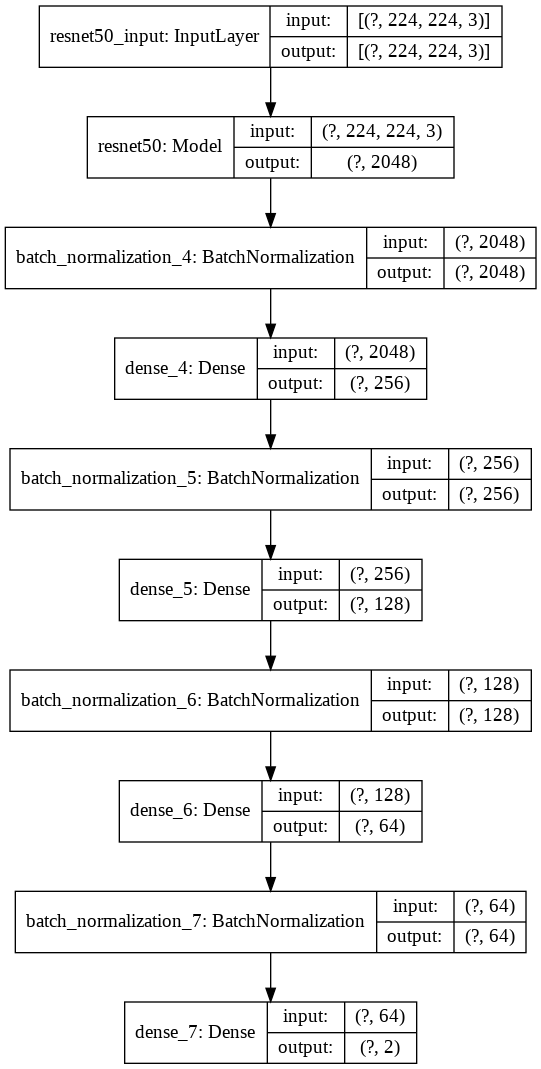

In [24]:
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

In [25]:
train_time = time.time()
fit_history = model.fit(x_train,
                        y_train,
                        epochs=NUM_EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data =(x_test,y_test))
train_time_spent=time.time() - train_time

Epoch 1/2
29/29 [==============================] - 56s 2s/step - loss: 0.3319 - accuracy: 0.8567 - val_loss: 0.7583 - val_accuracy: 0.5200
Epoch 2/2
29/29 [==============================] - 51s 2s/step - loss: 0.1273 - accuracy: 0.9522 - val_loss: 0.7255 - val_accuracy: 0.5200


In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

4/4 - 4s - loss: 0.7255 - accuracy: 0.5200
Test accuracy: 0.5199999809265137


# Visualizes the Result

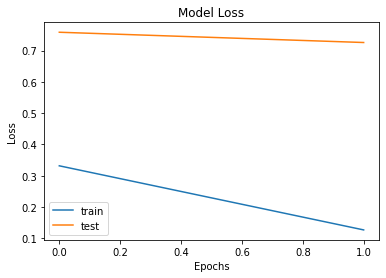

In [27]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

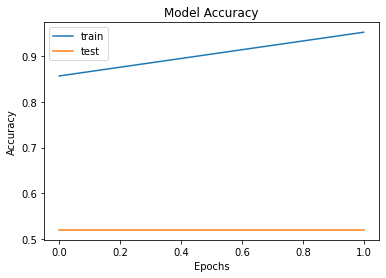

In [28]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Report : 
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        52
           1       0.00      0.00      0.00        48

    accuracy                           0.52       100
   macro avg       0.26      0.50      0.34       100
weighted avg       0.27      0.52      0.36       100



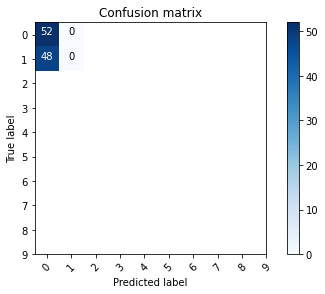

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(10))

print('Report : ')
print(classification_report(Y_true, Y_pred_classes))

In [32]:
total_time_spent=time.time() - total_time

print('Making data time spent:', make_data_time_spent)
print('Training time spent:', train_time_spent)
print('Total time spent:', total_time_spent)

Making data time spent: 639.1815934181213
Training time spent: 113.79635047912598
Total time spent: 18.228362560272217
